# Reading the Data

In [623]:
import pandas as pd
import MySQLdb
import pandas.io.sql as psql
import re, os
import numpy as np
from dotenv import load_dotenv
load_dotenv()
import seaborn as sns
sns.set_theme() # Set default grey theme with grid lines
import matplotlib.pyplot as plt

In [ ]:
# setup the database connection.  There's no need to setup cursors with pandas psql.
db=MySQLdb.connect(host=os.getenv('DB_HOST'), 
                   user=os.getenv('DB_USER'), 
                   passwd=os.getenv('DB_PASSWORD'), 
                   db='paris_RE')
# create the query
query1 = "select * from bien_ici_buy"
query2 = "select * from bien_ici_rent"
# execute the query and assign it to a pandas dataframe
buy = psql.read_sql(query1, con=db)
rent = psql.read_sql(query2, con=db)
# close the database connection
db.close()

In [625]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                2166 non-null   int64         
 1   price             2166 non-null   float64       
 2   price_square_mtr  2146 non-null   float64       
 3   size              2163 non-null   float64       
 4   rooms             2166 non-null   float64       
 5   bedrooms          1878 non-null   float64       
 6   bathrooms         1239 non-null   float64       
 7   realtor           2166 non-null   object        
 8   zip_code          2166 non-null   int64         
 9   url               2166 non-null   object        
 10  property_id       2166 non-null   object        
 11  timestamp         2166 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 203.2+ KB


In [626]:
buy.head()

,id,price,price_square_mtr,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
0,1,800000.0,18000.0,43.0,2.0,1.0,NaN,Les Enfants Rouges Le Marais - Alexandra MANIL,75004,https://www.bienici.com/annonce/vente/paris-4e...,/apimo-83589881?q=,2023-12-26 16:48:36
1,2,735000.0,8647.0,85.0,4.0,2.0,NaN,CENTURY 21 Saint-Fargeau,75020,https://www.bienici.com/annonce/vente/paris-20...,/century-21-202_2451_10762?q=,2023-12-26 16:48:36
2,3,325600.0,13900.0,23.0,1.0,NaN,NaN,Abriculteurs - Stéphanie ANRIOT,75007,https://www.bienici.com/annonce/vente/paris-7e...,/apimo-83836625?q=,2023-12-26 16:48:36
3,4,392000.0,8621.0,44.0,2.0,1.0,NaN,Abriculteurs - Stéphanie ANRIOT,75019,https://www.bienici.com/annonce/vente/paris-19...,/apimo-83800054?q=,2023-12-26 16:48:36
4,5,1100000.0,10000.0,105.0,6.0,4.0,2.0,DE FERLA IMMOBILIER,75014,https://www.bienici.com/annonce/vente/paris-14...,/ag750523-407039141?q=,2023-12-26 16:48:36


In [627]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1544 non-null   int64         
 1   monthly_rent  1544 non-null   float64       
 2   size          1539 non-null   float64       
 3   rooms         1539 non-null   float64       
 4   bedrooms      1267 non-null   float64       
 5   bathrooms     628 non-null    float64       
 6   realtor       1544 non-null   object        
 7   zip_code      1542 non-null   float64       
 8   url           1544 non-null   object        
 9   property_id   1544 non-null   object        
 10  timestamp     1544 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 132.8+ KB


In [628]:
rent.head()

,id,monthly_rent,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
0,1,6500.0,155.0,5.0,2.0,NaN,Daniel Féau Location - Passy & La Muette,75016.0,https://www.bienici.com/annonce/location/paris...,/apimo-83469422?q=,2023-12-26 20:07:35
1,2,1900.0,42.0,1.0,1.0,1.0,BLUEGROUND FRANCE - Blueground Paris,75016.0,https://www.bienici.com/annonce/location/paris...,/gedeon-25262428?q=,2023-12-26 20:07:35
2,3,1600.0,29.0,2.0,1.0,1.0,DE FERLA VAVIN,75006.0,https://www.bienici.com/annonce/location/paris...,/ag751877-403909395?q=,2023-12-26 20:07:35
3,4,1216.0,34.0,1.0,NaN,1.0,DE FERLA VAVIN,75005.0,https://www.bienici.com/annonce/location/paris...,/ag751877-404421288?q=,2023-12-26 20:07:35
4,5,2900.0,76.0,4.0,3.0,2.0,DE FERLA VAVIN,75014.0,https://www.bienici.com/annonce/location/paris...,/ag751877-403541430?q=,2023-12-26 20:07:35


# Cleaning the Data

## 1: Duplicates

In [629]:
# Checking for duplicates
buy[buy.duplicated(subset=['property_id'])].head()

,id,price,price_square_mtr,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
260,261,740000.0,9883.0,72.0,2.0,1.0,NaN,Stéphane Plaza Immobilier Paris 12 ème - Yann ...,75012,https://www.bienici.com/annonce/vente/paris-12...,/immo-facile-4153087?q=,2023-12-26 17:06:15
286,287,189000.0,11100.0,16.0,1.0,NaN,1.0,DE FERLA IMMOBILIER,75009,https://www.bienici.com/annonce/vente/paris-9e...,/ag750523-407953679?q=,2023-12-26 17:08:15
416,417,384000.0,11800.0,32.0,2.0,1.0,NaN,Citya Bonnefoi Immobilier,75014,https://www.bienici.com/annonce/vente/paris-14...,/citya-immobilier-41372534200013-TAPP517726?q=,2023-12-26 17:17:23
417,418,366000.0,9385.0,39.0,3.0,2.0,NaN,BIEN SUR IMMO - Sophie COUSON,75013,https://www.bienici.com/annonce/vente/paris-13...,/ag755694-407467202?q=,2023-12-26 17:17:23
430,431,169850.0,11300.0,15.0,1.0,NaN,1.0,Quartier Général Immobilier,75016,https://www.bienici.com/annonce/vente/paris-16...,/netty-habitatandco-appt-2815?q=,2023-12-26 17:18:03


In [630]:
len(buy[buy.duplicated(subset=['property_id'])])

48

In [631]:
rent[rent.duplicated(subset=['property_id'])].head()

,id,monthly_rent,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
134,135,3360.0,102.0,3.0,2.0,NaN,Citya Laxe Immobilier,75007.0,https://www.bienici.com/annonce/location/paris...,/citya-immobilier-749865-GES00470001-478?q=,2023-12-26 20:15:57
161,162,5890.0,129.0,5.0,4.0,3.0,FORTIS IMMO PARIS GESTION,75013.0,https://www.bienici.com/annonce/location/paris...,/immo-facile-54351621?q=,2023-12-26 20:17:48
217,218,1900.0,42.0,1.0,1.0,1.0,BLUEGROUND FRANCE - Blueground Paris,75016.0,https://www.bienici.com/annonce/location/paris...,/gedeon-25262428?q=,2023-12-26 20:21:23
235,236,2050.0,64.0,2.0,1.0,1.0,FORTIS IMMO PARIS GESTION,75016.0,https://www.bienici.com/annonce/location/paris...,/immo-facile-54803864?q=,2023-12-26 20:22:43
287,288,2990.0,80.0,3.0,2.0,1.0,D & J PARIS IMMO,75004.0,https://www.bienici.com/annonce/location/paris...,/hektor-detjparisimmo-122?q=,2023-12-26 20:26:11


In [632]:
len(rent[rent.duplicated(subset=['property_id'])])

85

I will need to fix this bug in the scraper, but for now I'll remove them.

In [633]:
buy = buy.drop_duplicates(subset=['property_id'])
rent = rent.drop_duplicates(subset=['property_id'])

In [634]:
buy[buy.duplicated(subset=['property_id'])].head()

,id,price,price_square_mtr,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp


## 2: Incorrect Data Types:

In [635]:
# Zip_code should be a str variable, not an int or float because it's categorical
rent['zip_code'] = rent['zip_code'].astype(str).apply(lambda x: x[:-2] if x.endswith('.0') else x)
buy['zip_code'] = buy['zip_code'].astype(str)

## 3: Invalid Values:

In [636]:
rent['zip_code'].value_counts()

zip_code
75016    194
75017    167
75015    158
75008     99
75018     95
75007     72
75014     71
75013     67
75019     62
75011     57
75006     53
75020     51
75009     49
75005     42
75116     39
75012     39
75010     37
75002     31
75004     31
75003     31
75001     13
nan        1
Name: count, dtype: int64

In [637]:
buy['zip_code'].value_counts()

zip_code
75015    341
75017    187
75014    178
75018    174
75016    144
75020    131
75012    130
75013    125
75011    115
75019    111
75010     92
75007     74
75005     68
75009     66
75008     47
75006     41
75002     22
75116     21
75004     18
75001     17
75003     16
Name: count, dtype: int64

There is no such zip_code as 75116. I suspect it's 75016 but I will confirm.

In [638]:
# sample of properties with zip code 75116
print(rent[rent['zip_code'] == '75116']['url'].iloc[0],'\n',
rent[rent['zip_code'] == '75116']['url'].iloc[5],'\n',
rent[rent['zip_code'] == '75116']['url'].iloc[10])

https://www.bienici.com/annonce/location/paris-16e/appartement/2pieces/ag991156-402982251?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D2 
 https://www.bienici.com/annonce/location/paris-16e/appartement/2pieces/ag991156-402982326?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D6 
 https://www.bienici.com/annonce/location/paris-16e/appartement/2pieces/ag991156-396386153?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D8


All sampled properties are 75016 and from the same realtor. I'll fix these and move on.

In [639]:
rent.loc[
    rent['zip_code'] == '75116', 'zip_code'
] = '75016'

buy.loc[
    buy['zip_code'] == '75116', 'zip_code'
] = '75016'

Let's check for any other abnormalities:

In [640]:
rent.describe()

,id,monthly_rent,size,rooms,bedrooms,bathrooms,timestamp
count,1459.000000,1459.000000,1454.000000,1455.000000,1194.000000,587.000000,1459
mean,763.146676,2741.059630,64.508941,2.619931,1.849246,4.896082,2023-12-26 21:38:05.990404352
min,1.000000,170.000000,6.000000,1.000000,1.000000,1.000000,2023-12-26 20:07:35
25%,373.500000,1384.000000,29.000000,2.000000,1.000000,1.000000,2023-12-26 20:31:44
50%,768.000000,1990.000000,48.000000,2.000000,1.000000,1.000000,2023-12-26 20:57:46
75%,1146.500000,2990.000000,80.000000,3.000000,2.000000,1.000000,2023-12-26 22:48:36
max,1535.000000,40000.000000,1850.000000,10.000000,135.000000,2161.000000,2023-12-26 23:25:25
std,445.148064,2847.303052,70.244668,1.461289,3.990440,89.145265,NaN


problems properties here:
- 2161 bathrooms is absurd
- 40,000 eur per month is a lot (but not impossible)
- 1850 m2 is a lot
- 170 eur per month is way too cheap

I'll need to look at these to verify.

In [641]:
rent[(rent['bathrooms'] == 2161.0) | (rent['monthly_rent'] == 40000.0) | (rent['bedrooms'] == 135.0) | (rent['size'] == 1850.0) | (rent['monthly_rent'] < 400.0)]

,id,monthly_rent,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
383,384,4850.0,161.0,6.0,5.0,2161.0,GTF LOCATION - Tina CHEBBI,75002,https://www.bienici.com/annonce/location/paris...,/ag755289-401111451?q=,2023-12-26 20:32:25
775,776,2490.0,1850.0,3.0,2.0,1.0,BLUEGROUND FRANCE - Blueground Paris,75010,https://www.bienici.com/annonce/location/paris...,/gedeon-25081904?q=,2023-12-26 20:58:08
1199,1200,650.0,9.0,1.0,135.0,NaN,NOUS GERONS - Agathe PAJADON - NousGérons,75009,https://www.bienici.com/annonce/location/paris...,/ag754025-405446495?q=,2023-12-26 22:52:32
1260,1261,40000.0,460.0,9.0,4.0,6.0,HAUSSMANN PRESTIGE PARIS - Richard BELLANGER,75016,https://www.bienici.com/annonce/location/paris...,/ag750861-390234452?q=,2023-12-26 22:56:36
1453,1454,170.0,NaN,NaN,NaN,NaN,Joya - Léo SIMON,75016,https://www.bienici.com/annonce/location/paris...,/apimo-83739699?q=,2023-12-26 23:10:17


In [642]:
for x in rent[(rent['bathrooms'] == 2161.0) | (rent['monthly_rent'] == 40000.0) | (rent['bedrooms'] == 135.0) | (rent['size'] == 1850.0) | (rent['monthly_rent'] < 500.0)]['url'] :
    print(x)

https://www.bienici.com/annonce/location/paris-2e/appartement/6pieces/ag755289-401111451?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D15
https://www.bienici.com/annonce/location/paris-2e/appartement/1piece/hektor-310_iparticuliersadmin-20279?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D21
https://www.bienici.com/annonce/location/paris-10e/appartement/3pieces/gedeon-25081904?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D30
https://www.bienici.com/annonce/location/paris-9e/appartement/1piece/ag754025-405446495?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D47
https://www.bienici.com/annonce/location/paris-16e/appartement/9pieces/ag750861-390234452?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D50
https://www.bienici.com/annonce/location/paris-5e/appartement/1piece/immo-facile-54827464?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D51
https://www.bienici.com/annonce/location/paris-7e/appartement/1piece/hektor-LABONNEAGENCEPARIS2022-1345?q=%2Frecherche%2Flocation%2Fparis-7

answers:
- The realtor made a typo with the bathrooms
- The 40k per month apartment is real
- The realtor added an extra 0
- The 170eur property is a parking spot

I'll fix these:

In [643]:
rent.loc[
    rent['id'] == 384, 'bathrooms'
] = 2.0

rent.loc[
    rent['id'] == 776, 'size'
] = 185.0

rent.loc[
    rent['id'] == 1200, 'bedrooms'
] = 1.0

rent = rent[rent['id'] != 1454]

In [644]:
buy.describe()

,id,price,price_square_mtr,size,rooms,bedrooms,bathrooms,timestamp
count,2118.000000,2.118000e+03,2098.000000,2115.000000,2118.000000,1839.000000,1215.000000,2118
mean,1078.787063,7.934887e+05,10550.342707,194.886052,3.080737,2.004894,1.264198,2023-12-26 18:12:30.296033792
min,1.000000,4.500000e+04,2610.000000,5.000000,1.000000,1.000000,1.000000,2023-12-26 16:48:36
25%,538.250000,3.770000e+05,8662.250000,38.500000,2.000000,1.000000,1.000000,2023-12-26 17:26:13
50%,1076.500000,5.900000e+05,9929.000000,59.000000,3.000000,2.000000,1.000000,2023-12-26 18:09:21
75%,1617.750000,8.987500e+05,11600.000000,90.000000,4.000000,3.000000,1.000000,2023-12-26 19:01:10
max,2166.000000,3.000000e+07,48700.000000,78119.000000,35.000000,33.000000,5.000000,2023-12-26 19:40:05
std,625.679612,1.022598e+06,3236.502337,2493.933694,1.905564,1.486785,0.544701,NaN


The only funky value here to me is the property with 33 bedrooms.

In [645]:
buy[buy['bedrooms'] > 10.0]

,id,price,price_square_mtr,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
273,274,275600.0,13400.0,21.0,1.0,11.0,NaN,Citya Bonnefoi Immobilier,75011,https://www.bienici.com/annonce/vente/paris-11...,/citya-immobilier-41372534200013-TAPP516272?q=,2023-12-26 17:07:16
503,504,266000.0,8581.0,31.0,1.0,31.0,NaN,Citya Bonnefoi Immobilier,75015,https://www.bienici.com/annonce/vente/paris-15...,/citya-immobilier-41372534200013-TAPP516860?q=,2023-12-26 17:23:36
1585,1586,650000.0,7440.0,84.0,4.0,33.0,2.0,L'IMMOBILIER PARISIEN - MONTMARTRE - MARINE KHLAT,75018,https://www.bienici.com/annonce/vente/paris-18...,/ag751948-407274833?q=,2023-12-26 18:58:19
1902,1903,10765000.0,16300.0,646.0,10.0,15.0,NaN,DE FERLA VAVIN,75006,https://www.bienici.com/annonce/vente/paris-6e...,/ag751877-404965619?q=,2023-12-26 19:21:17


In [646]:
for x in buy[buy['bedrooms'] > 10.0]['url']:
    print(x)

https://www.bienici.com/annonce/vente/paris-11e/appartement/1piece/citya-immobilier-41372534200013-TAPP516272?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D11
https://www.bienici.com/annonce/vente/paris-15e/appartement/1piece/citya-immobilier-41372534200013-TAPP516860?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D20
https://www.bienici.com/annonce/vente/paris-18e/appartement/4pieces/ag751948-407274833?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D61
https://www.bienici.com/annonce/vente/paris-6e/hotel-particulier/10pieces/ag751877-404965619?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D74


In [647]:
# let's replace these with their proper values:
buy.loc[
    buy['id'] == 1586, 'bedrooms'
] = 3.0

buy.loc[
    buy['id'] == 274, 'bedrooms'
] = 1.0

buy.loc[
    buy['id'] == 504, 'bedrooms'
] = 1.0

## 4. Missing Values

In [648]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1534
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1458 non-null   int64         
 1   monthly_rent  1458 non-null   float64       
 2   size          1454 non-null   float64       
 3   rooms         1455 non-null   float64       
 4   bedrooms      1194 non-null   float64       
 5   bathrooms     587 non-null    float64       
 6   realtor       1458 non-null   object        
 7   zip_code      1458 non-null   object        
 8   url           1458 non-null   object        
 9   property_id   1458 non-null   object        
 10  timestamp     1458 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 136.7+ KB


### missing values #1 - bathrooms
Nearly half of the properties for rent have no bathroom listed. I doubt they're all genuinely maids rooms with a communal bathroom.

If the apartment is larger than 20m2 I would guess that there is a bathroom, but it's still worth investigating.

In [649]:
rent[(rent['bathrooms'].isna()) & (rent['size'] >= 20.0)]

,id,monthly_rent,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
0,1,6500.0,155.0,5.0,2.0,NaN,Daniel Féau Location - Passy & La Muette,75016,https://www.bienici.com/annonce/location/paris...,/apimo-83469422?q=,2023-12-26 20:07:35
11,12,1277.0,42.0,2.0,1.0,NaN,Citya Etoile,75016,https://www.bienici.com/annonce/location/paris...,/citya-immobilier-5049-GES02490012-182?q=,2023-12-26 20:08:14
13,14,1799.0,36.0,1.0,1.0,NaN,Équipe de Homelike,75004,https://www.bienici.com/annonce/location/paris...,/ag991156-408544157?q=,2023-12-26 20:08:14
15,16,1284.0,42.0,2.0,1.0,NaN,STARES GESTION LOCATIVE,75015,https://www.bienici.com/annonce/location/paris...,/ag755493-407435471?q=,2023-12-26 20:08:14
17,18,1616.0,44.0,2.0,1.0,NaN,FLATLOOKER - Marie Ordener,75017,https://www.bienici.com/annonce/location/paris...,/ag752345-406769327?q=,2023-12-26 20:08:31
...,...,...,...,...,...,...,...,...,...,...,...
1519,1520,1250.0,35.0,2.0,1.0,NaN,FHP Immobilier - Anthony Miguel JOSEPH,75017,https://www.bienici.com/annonce/location/paris...,/ag695527-408072908?q=,2023-12-26 23:14:34
1520,1521,1470.0,43.0,2.0,1.0,NaN,Joya - Léo SIMON,75006,https://www.bienici.com/annonce/location/paris...,/apimo-83818659?q=,2023-12-26 23:14:34
1524,1525,1130.0,27.0,1.0,NaN,NaN,FHP Immobilier - Anthony Miguel JOSEPH,75020,https://www.bienici.com/annonce/location/paris...,/ag695527-406656140?q=,2023-12-26 23:14:53
1526,1527,4200.0,90.0,3.0,2.0,NaN,CATTALAN JOHNSON IMMOBILIER,75008,https://www.bienici.com/annonce/location/paris...,/ag753889-393845603?q=,2023-12-26 23:14:53


In [650]:
for x in rent[(rent['bathrooms'].isna()) & (rent['size'] >= 20.0)]['url'][:20]:
    print(x)

https://www.bienici.com/annonce/location/paris-16e/appartement/5pieces/apimo-83469422?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D1&depuis-mise-en-avant=oui
https://www.bienici.com/annonce/location/paris-16e/appartement/2pieces/citya-immobilier-5049-GES02490012-182?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/location/paris-4e/appartement/1piece/ag991156-408544157?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/location/paris-15e/appartement/2pieces/ag755493-407435471?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/location/paris-17e/appartement/2pieces/ag752345-406769327?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/location/paris-20e/appartement/2pieces/ag752345-405750677?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/location/paris-9e/appartement/1piece/citya-immobilier-41372534200013-GES40310001-933

In [651]:
for x in buy[(buy['bathrooms'].isna()) & (buy['size'] >= 20.0)]['url'][:20]:
    print(x)

https://www.bienici.com/annonce/vente/paris-4e/appartement/2pieces/apimo-83589881?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1&depuis-mise-en-avant=oui
https://www.bienici.com/annonce/vente/paris-20e/appartement/4pieces/century-21-202_2451_10762?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1&depuis-mise-en-avant=oui
https://www.bienici.com/annonce/vente/paris-7e/appartement/1piece/apimo-83836625?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/vente/paris-19e/appartement/2pieces/apimo-83800054?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/vente/paris-16e/appartement/3pieces/apimo-83826318?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/vente/paris-14e/appartement/4pieces/apimo-83641141?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/vente/paris-15e/appartement/3pieces/ag753010-403580928?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1
https://www.bienici.c

2 issues:
- 1: some listings have 'salle de bains' or 'salle d’eau' rather than the usual 'WC'. I'll have to update the scraper for this.
- 2: some listings have nothing at all but the photos show that there are bathrooms.

For now I'll impute 1 for properties over 15m2

In [652]:
rent.loc[rent['size'] > 15.0, 'bathrooms'] = rent.loc[rent['size'] > 15.0, 'bathrooms'].fillna(1.0)

In [653]:
buy.loc[buy['size'] > 15.0, 'bathrooms'] = buy.loc[buy['size'] > 15.0, 'bathrooms'].fillna(1.0)


### missing values #2 - bedrooms

In [654]:
rent[rent['bedrooms'].isna()]

,id,monthly_rent,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
3,4,1216.0,34.0,1.0,NaN,1.0,DE FERLA VAVIN,75005,https://www.bienici.com/annonce/location/paris...,/ag751877-404421288?q=,2023-12-26 20:07:35
5,6,1130.0,19.0,1.0,NaN,1.0,DE FERLA VAVIN,75006,https://www.bienici.com/annonce/location/paris...,/ag751877-408602261?q=,2023-12-26 20:07:35
6,7,1390.0,25.0,1.0,NaN,1.0,PARIS SEINE CHERCHE-MIDI - Location,75006,https://www.bienici.com/annonce/location/paris...,/immo-facile-54839756?q=,2023-12-26 20:07:57
8,9,1100.0,17.0,1.0,NaN,1.0,DE FERLA VAVIN,75007,https://www.bienici.com/annonce/location/paris...,/ag751877-405871364?q=,2023-12-26 20:07:57
9,10,724.0,12.0,1.0,NaN,NaN,Citya Kst,75008,https://www.bienici.com/annonce/location/paris...,/citya-immobilier-58200569000026-GES13680017-9...,2023-12-26 20:07:57
...,...,...,...,...,...,...,...,...,...,...,...
1511,1512,1150.0,33.0,1.0,NaN,1.0,BONAPART IMMOBILIER 15 ème - BPI 15,75015,https://www.bienici.com/annonce/location/paris...,/ag752485-392658536?q=,2023-12-26 23:13:59
1512,1513,1090.0,14.0,1.0,NaN,NaN,BONAPART IMMOBILIER 15 ème - BPI 15,75006,https://www.bienici.com/annonce/location/paris...,/ag752485-391285244?q=,2023-12-26 23:13:59
1513,1514,900.0,22.0,1.0,NaN,1.0,BONAPART IMMOBILIER 15 ème - BPI 15,75015,https://www.bienici.com/annonce/location/paris...,/ag752485-389908929?q=,2023-12-26 23:13:59
1524,1525,1130.0,27.0,1.0,NaN,1.0,FHP Immobilier - Anthony Miguel JOSEPH,75020,https://www.bienici.com/annonce/location/paris...,/ag695527-406656140?q=,2023-12-26 23:14:53


In [655]:
for x in buy[buy['bedrooms'].isna()]['url'][:10]:
    print(x)

https://www.bienici.com/annonce/vente/paris-7e/appartement/1piece/apimo-83836625?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D1
https://www.bienici.com/annonce/vente/paris-15e/appartement/1piece/ag753637-401491215?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D2
https://www.bienici.com/annonce/vente/paris-5e/appartement/1piece/ag753659-400099272?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D2
https://www.bienici.com/annonce/vente/paris-14e/appartement/1piece/ag750524-397819545?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D2
https://www.bienici.com/annonce/vente/paris-14e/appartement/1piece/ag750523-395145281?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D2
https://www.bienici.com/annonce/vente/paris-14e/appartement/1piece/ag750523-407953691?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D2
https://www.bienici.com/annonce/vente/paris-14e/appartement/1piece/ag750524-406085741?q=%2Frecherche%2Fachat%2Fparis-75000%3Fpage%3D3
https://www.bienici.com/annonce/vente/paris-16e/appartement/1piece/a

If the number of rooms is 1, ill impute 1 bedroom.

In [656]:
buy.loc[buy['rooms'] == 1.0, 'bedrooms'] = buy.loc[buy['rooms'] == 1.0, 'bedrooms'].fillna(1.0)
buy[buy['bedrooms'].isna()].head()

,id,price,price_square_mtr,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
147,148,2390000.0,12200.0,188.0,6.0,NaN,1.0,DOLY - Eva TAIEB,75011,https://www.bienici.com/annonce/vente/paris-11...,/apimo-83529266?q=,2023-12-26 16:59:04
161,162,2390000.0,12200.0,188.0,6.0,NaN,1.0,DOLY - Eva TAIEB,75011,https://www.bienici.com/annonce/vente/paris-11...,/apimo-83461238?q=,2023-12-26 16:59:55
395,396,888000.0,6217.0,138.0,7.0,NaN,1.0,BIEN SUR IMMO - Daniel TRAN,75013,https://www.bienici.com/annonce/vente/paris-13...,/ag755694-400328994?q=,2023-12-26 17:15:36
431,432,462000.0,10700.0,41.0,3.0,NaN,1.0,DE FERLA IMMOBILIER,75014,https://www.bienici.com/annonce/vente/paris-14...,/ag750523-397521453?q=,2023-12-26 17:18:25
646,647,595000.0,11000.0,54.0,3.0,NaN,1.0,ORALIA Garraud Maillet - Sebastien SOUBIELLE,75017,https://www.bienici.com/annonce/vente/paris-17...,/oralia-0041-TAPP22908?q=,2023-12-26 17:34:54


In [657]:
rent.loc[rent['rooms'] == 1.0, 'bedrooms'] = rent.loc[rent['rooms'] == 1.0, 'bedrooms'].fillna(1.0)
rent[rent['bedrooms'].isna()].head()

,id,monthly_rent,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
640,641,1450.0,28.0,3.0,NaN,1.0,NOUS GERONS - Marc KOULETIO - NousGérons,75010,https://www.bienici.com/annonce/location/paris...,/ag754025-405932651?q=,2023-12-26 20:49:14
835,836,2360.0,78.0,4.0,NaN,1.0,CABINET MICHAU,75015,https://www.bienici.com/annonce/location/paris...,/ag751223-405761102?q=,2023-12-26 22:27:09
906,907,1640.0,67.0,3.0,NaN,1.0,Foncia Location Paris - Foncia Paris Rive Gauche,75018,https://www.bienici.com/annonce/location/paris...,/ag756612-407777546?q=,2023-12-26 22:31:57
1011,1012,21500.0,317.0,6.0,NaN,1.0,Barnes Rentals Trocadéro,75016,https://www.bienici.com/annonce/location/paris...,/apimo-83523529?q=,2023-12-26 22:39:18
1084,1085,2791.0,75.0,3.0,NaN,1.0,CREDIT AGRICOLE IMMOBILIER,75006,https://www.bienici.com/annonce/location/paris...,/mgc-ancien-p_73_4_2945?q=,2023-12-26 22:44:18


In [658]:
print(len(rent[rent['bedrooms'].isna()]),'\n',
      len(buy[buy['bedrooms'].isna()]))

15 
 23


I'm happy to drop the above, it isn't a large portion of the dataset.

### missing values #3 - zip codes

In [659]:
rent[rent['zip_code'] == 'nan']

,id,monthly_rent,size,rooms,bedrooms,bathrooms,realtor,zip_code,url,property_id,timestamp
116,117,1800.0,39.0,3.0,1.0,1.0,KTS IMMOBILIER - KTS l'immobilier parisien,nan,https://www.bienici.com/annonce/location/paris...,/hektor-ktsimmo-641?q=,2023-12-26 20:15:03


In [660]:
rent[rent['zip_code'] == 'nan']['url'].iloc[0]

'https://www.bienici.com/annonce/location/paris-5e/appartement/3pieces/hektor-ktsimmo-641?q=%2Frecherche%2Flocation%2Fparis-75000%3Fpage%3D5'

This apartment is in the 75005 postcode. I'll add that in.

In [661]:
rent.loc[rent['id'] == 117, 'zip_code'] = '75005'

### Let's drop the remaining missing values:

In [662]:
rent = rent.dropna()
rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 0 to 1534
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1356 non-null   int64         
 1   monthly_rent  1356 non-null   float64       
 2   size          1356 non-null   float64       
 3   rooms         1356 non-null   float64       
 4   bedrooms      1356 non-null   float64       
 5   bathrooms     1356 non-null   float64       
 6   realtor       1356 non-null   object        
 7   zip_code      1356 non-null   object        
 8   url           1356 non-null   object        
 9   property_id   1356 non-null   object        
 10  timestamp     1356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 127.1+ KB


In [663]:
buy = buy.dropna()
buy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 0 to 2165
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                2017 non-null   int64         
 1   price             2017 non-null   float64       
 2   price_square_mtr  2017 non-null   float64       
 3   size              2017 non-null   float64       
 4   rooms             2017 non-null   float64       
 5   bedrooms          2017 non-null   float64       
 6   bathrooms         2017 non-null   float64       
 7   realtor           2017 non-null   object        
 8   zip_code          2017 non-null   object        
 9   url               2017 non-null   object        
 10  property_id       2017 non-null   object        
 11  timestamp         2017 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 204.9+ KB


# Analysing the Data

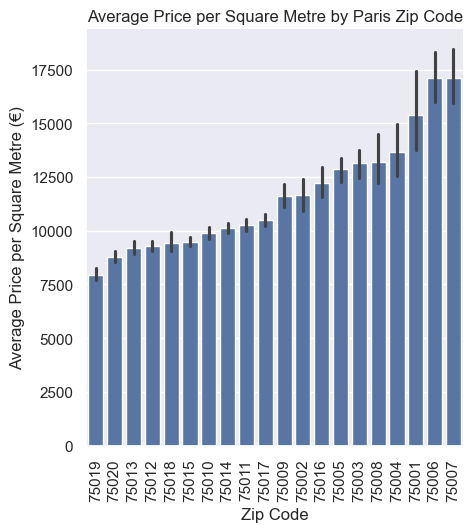

In [664]:
avg_price_by_zip = buy.groupby('zip_code')['price_square_mtr'].mean().sort_values()
g = sns.catplot(
    data = buy, kind='bar',
    x='zip_code', y='price_square_mtr',
    order=avg_price_by_zip.index
).set(title="Average Price per Square Metre by Paris Zip Code")
g.set_xticklabels(rotation = 90)
g.set_axis_labels("Zip Code","Average Price per Square Metre (€)")

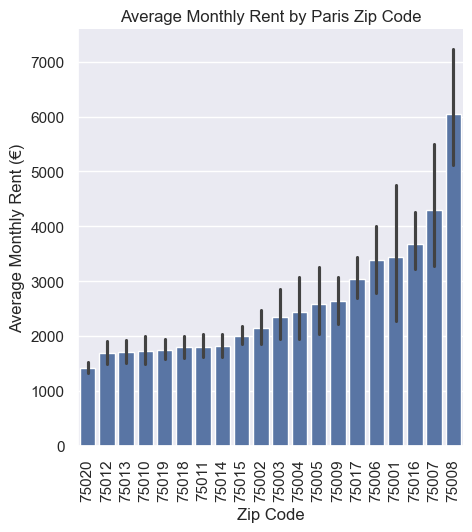

In [665]:
avg_rent_by_zip = rent.groupby('zip_code')['monthly_rent'].mean().sort_values()
g=sns.catplot(
    data=rent, kind='bar',
    x='zip_code', y='monthly_rent',
    order = avg_rent_by_zip.index
).set(title="Average Monthly Rent by Paris Zip Code")

g.set_xticklabels(rotation = 90)
g.set_axis_labels("Zip Code","Average Monthly Rent (€)")

The above doesn't paint the full picture. It's worth considering what you get for your rent.

A 15m2 studio apartment may rent for 1000 eur a month
and a 60m2 3 bedroom apartment may rent for 1300 eur a month,

They aren't directly comparable. I will calculate the rent per square metre to shine some light on this.

In [666]:
rent['monthly_rent_per_mtr'] = rent['monthly_rent']/rent['size']
rent['monthly_rent_per_bedroom'] = rent['monthly_rent']/rent['bedrooms']

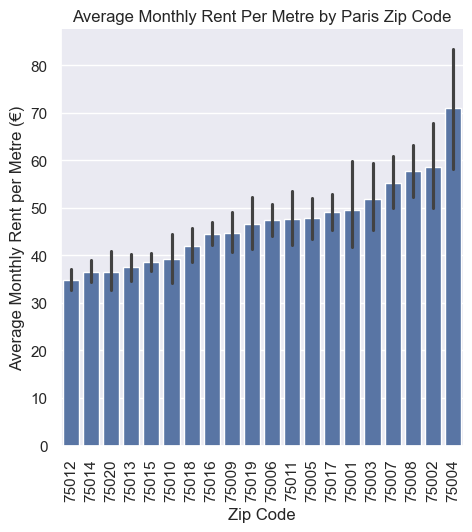

In [667]:
avg_rent_per_metre_by_zip = rent.groupby('zip_code')['monthly_rent_per_mtr'].mean().sort_values()
g=sns.catplot(
    data=rent, kind='bar',
    x='zip_code', y='monthly_rent_per_mtr',
    order = avg_rent_per_metre_by_zip.index
).set(title="Average Monthly Rent Per Metre by Paris Zip Code")

g.set_xticklabels(rotation = 90)
g.set_axis_labels("Zip Code","Average Monthly Rent per Metre (€)")

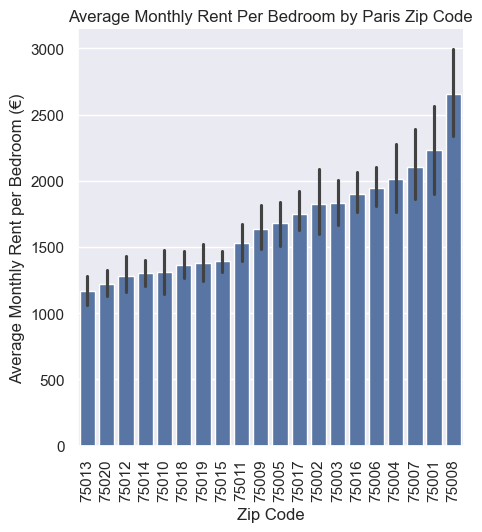

In [668]:
avg_rent_per_bedroom_by_zip = rent.groupby('zip_code')['monthly_rent_per_bedroom'].mean().sort_values()
g=sns.catplot(
    data=rent, kind='bar',
    x='zip_code', y='monthly_rent_per_bedroom',
    order = avg_rent_per_metre_by_zip.index
).set(title="Average Monthly Rent Per Bedroom by Paris Zip Code")

g.set_xticklabels(rotation = 90)
g.set_axis_labels("Zip Code","Average Monthly Rent per Bedroom (€)")

In [669]:
rent.describe()

,id,monthly_rent,size,rooms,bedrooms,bathrooms,timestamp,monthly_rent_per_mtr,monthly_rent_per_bedroom
count,1356.000000,1356.000000,1356.00000,1356.000000,1356.000000,1356.000000,1356,1356.000000,1356.000000
mean,769.982301,2799.178466,65.84587,2.670354,1.644543,1.094395,2023-12-26 21:38:50.601769984,45.708592,1685.789401
min,1.000000,535.000000,9.00000,1.000000,1.000000,1.000000,2023-12-26 20:07:35,13.459459,127.272727
25%,395.750000,1400.000000,32.00000,2.000000,1.000000,1.000000,2023-12-26 20:33:02,32.282012,1150.000000
50%,773.500000,2049.500000,50.50000,2.000000,1.000000,1.000000,2023-12-26 20:58:08,38.292871,1500.000000
75%,1142.500000,3000.000000,83.25000,3.000000,2.000000,1.000000,2023-12-26 22:48:12,50.927083,1995.500000
max,1535.000000,40000.000000,460.00000,10.000000,11.000000,6.000000,2023-12-26 23:25:25,152.173913,12500.000000
std,439.113600,2863.247424,51.94356,1.473417,0.988745,0.354119,NaN,20.407703,921.289820


In [670]:
buy.describe()

,id,price,price_square_mtr,size,rooms,bedrooms,bathrooms,timestamp
count,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017
mean,1067.739712,8.093731e+05,10515.889440,71.611304,3.070402,1.869113,1.155677,2023-12-26 18:11:35.119484160
min,1.000000,9.100000e+04,2610.000000,8.000000,1.000000,1.000000,1.000000,2023-12-26 16:48:36
25%,528.000000,3.950000e+05,8647.000000,40.000000,2.000000,1.000000,1.000000,2023-12-26 17:25:29
50%,1059.000000,5.990000e+05,9871.000000,60.000000,3.000000,2.000000,1.000000,2023-12-26 18:08:00
75%,1608.000000,8.999990e+05,11500.000000,90.000000,4.000000,2.000000,1.000000,2023-12-26 19:00:12
max,2166.000000,3.000000e+07,48700.000000,646.000000,11.000000,15.000000,5.000000,2023-12-26 19:40:05
std,625.025406,1.035747e+06,3244.879011,49.912668,1.555839,1.067523,0.437070,NaN


In [671]:
buy_features = ['price','price_square_mtr','size','rooms','bedrooms','bathrooms','zip_code']
rent_features = ['monthly_rent','monthly_rent_per_mtr', 'monthly_rent_per_bedroom','size','rooms','bedrooms','bathrooms','zip_code']

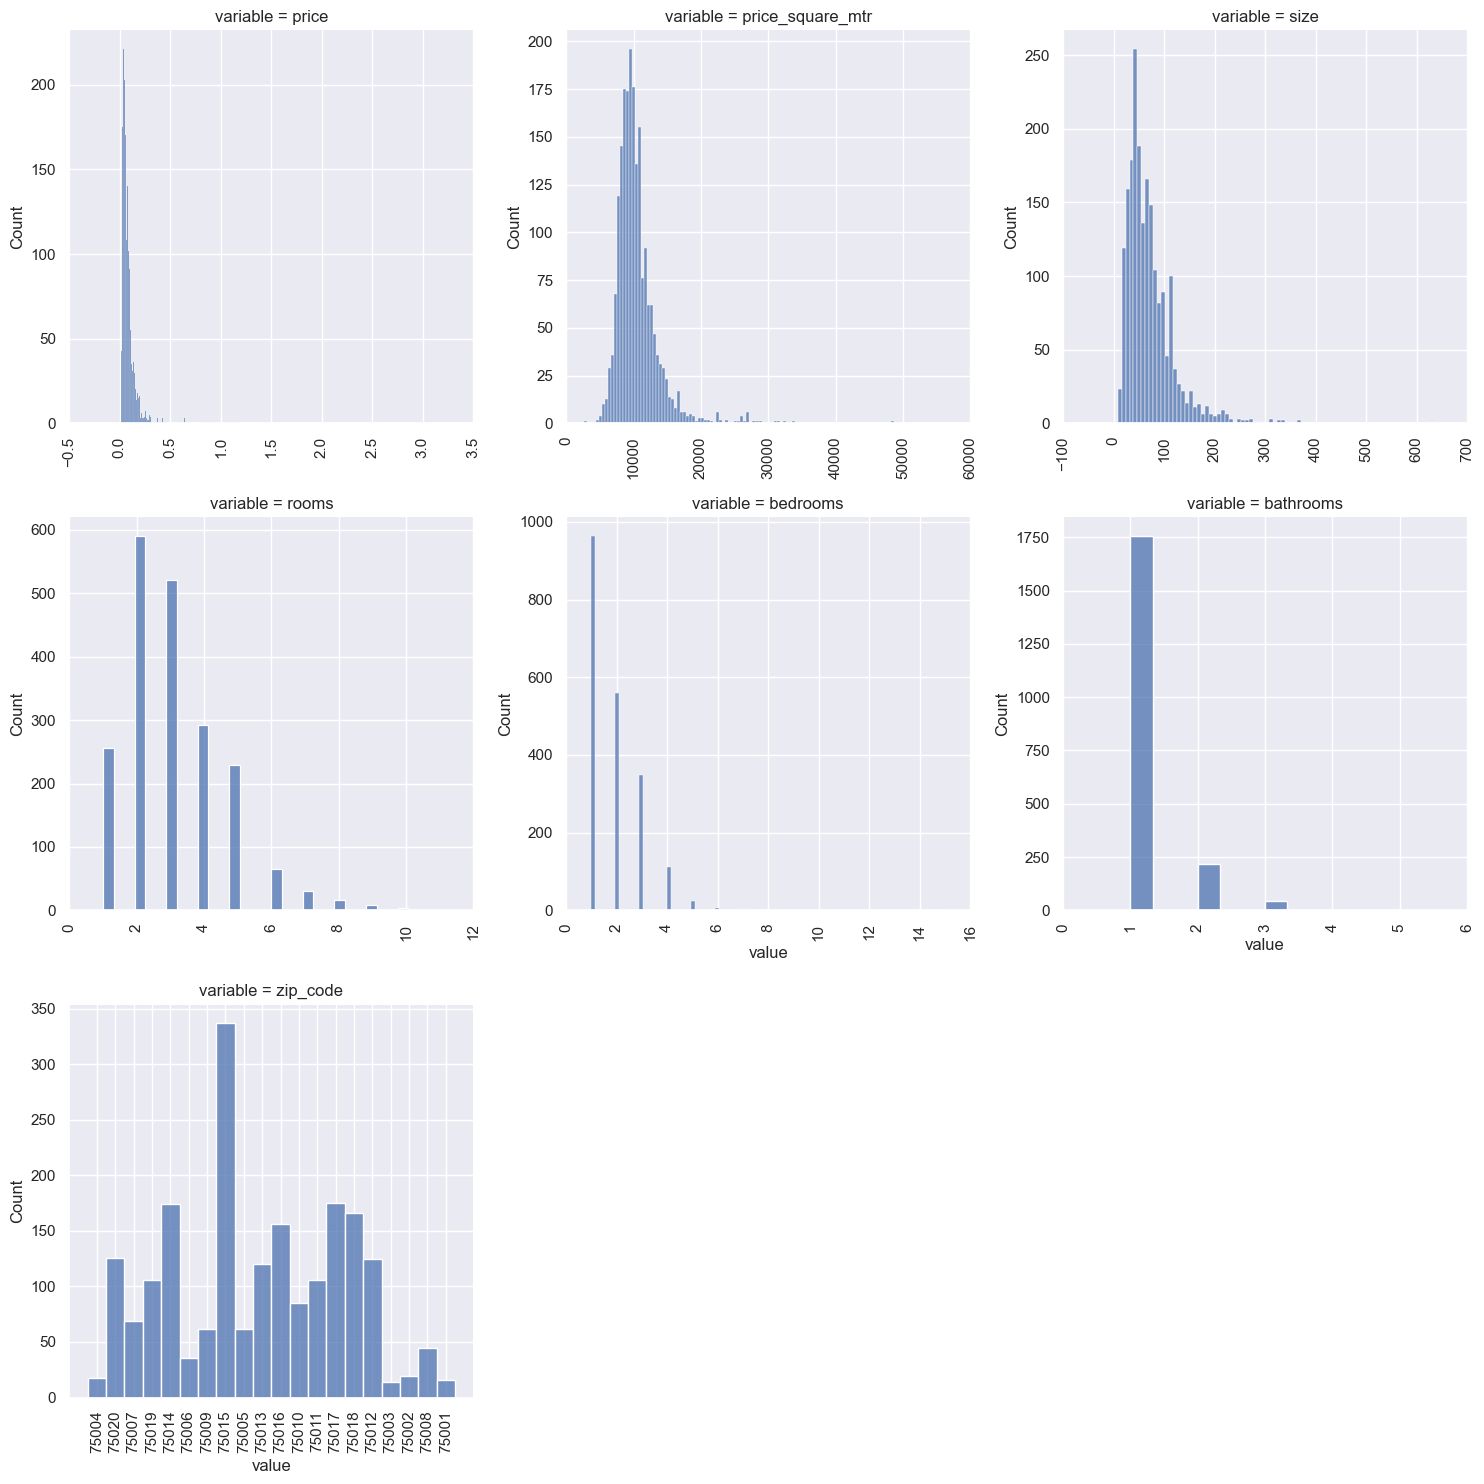

In [672]:
grid = sns.FacetGrid(buy[buy_features].melt(), col="variable", col_wrap=3, sharex=False, sharey=False, height=5)

# Map histograms to the grid
grid.map(sns.histplot, "value")
grid.set_xticklabels(rotation=90)

# Adjust layout for better spacing
grid.tight_layout()

# Show the plot
plt.show()

There's a lot of properties for sale in the 15th. This could skew the results. I'll need to stratify by zip code when splitting my data for testing

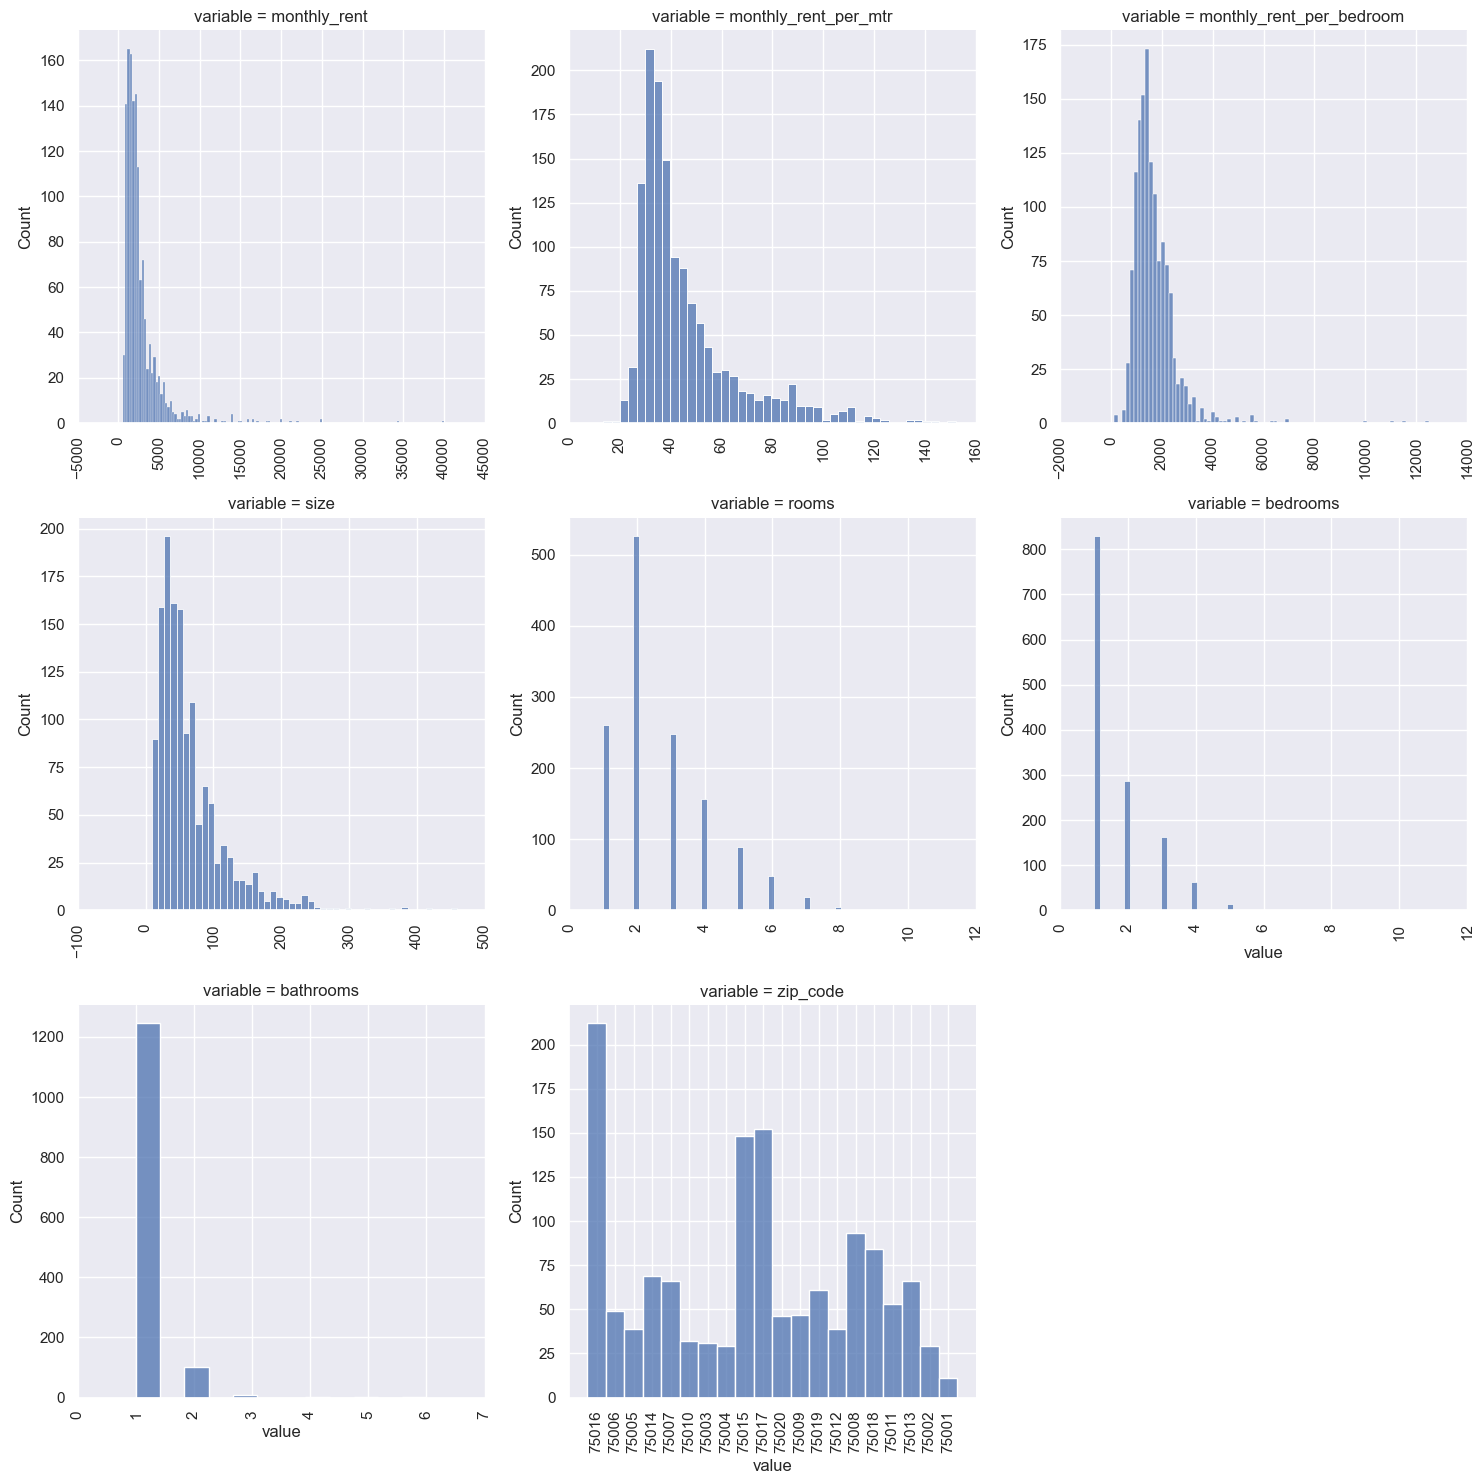

In [673]:
grid = sns.FacetGrid(rent[rent_features].melt(), col="variable", col_wrap=3, sharex=False, sharey=False, height=5)

# Map histograms to the grid
grid.map(sns.histplot, "value")
grid.set_xticklabels(rotation=90)

# Adjust layout for better spacing
grid.tight_layout()

# Show the plot
plt.show()

Most places for rent are in the 16th, which differs from the buy dataset.

These results could simply be due to the real estate agents that use bien ici. It doesn't prove anything by itself.

c:\Users\benja\OneDrive\Documents\Coding\Python\paris re analysis\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


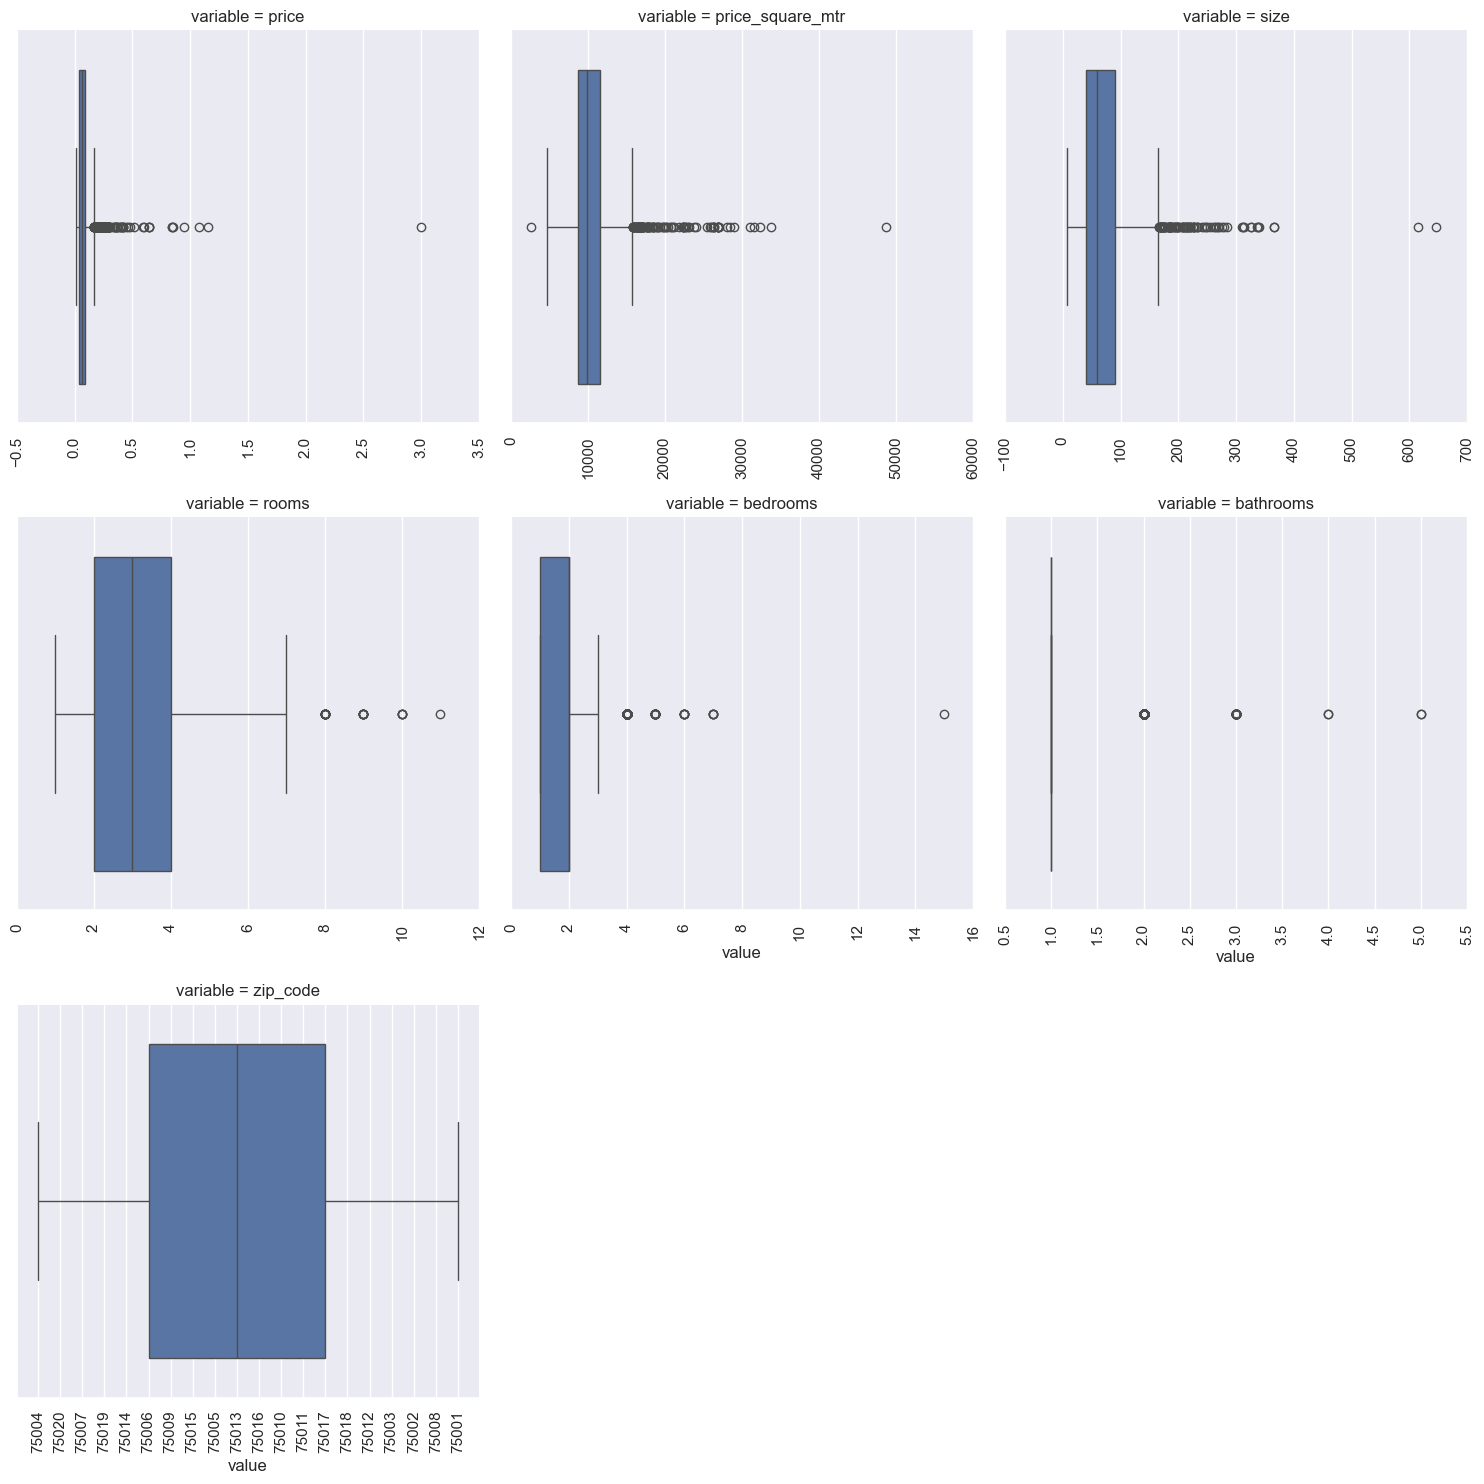

In [674]:
grid = sns.FacetGrid(buy[buy_features].melt(), col="variable", col_wrap=3, sharex=False, sharey=False, height=5)

# Map histograms to the grid
grid.map(sns.boxplot, "value")
grid.set_xticklabels(rotation=90)

# Adjust layout for better spacing
grid.tight_layout()

# Show the plot
plt.show()

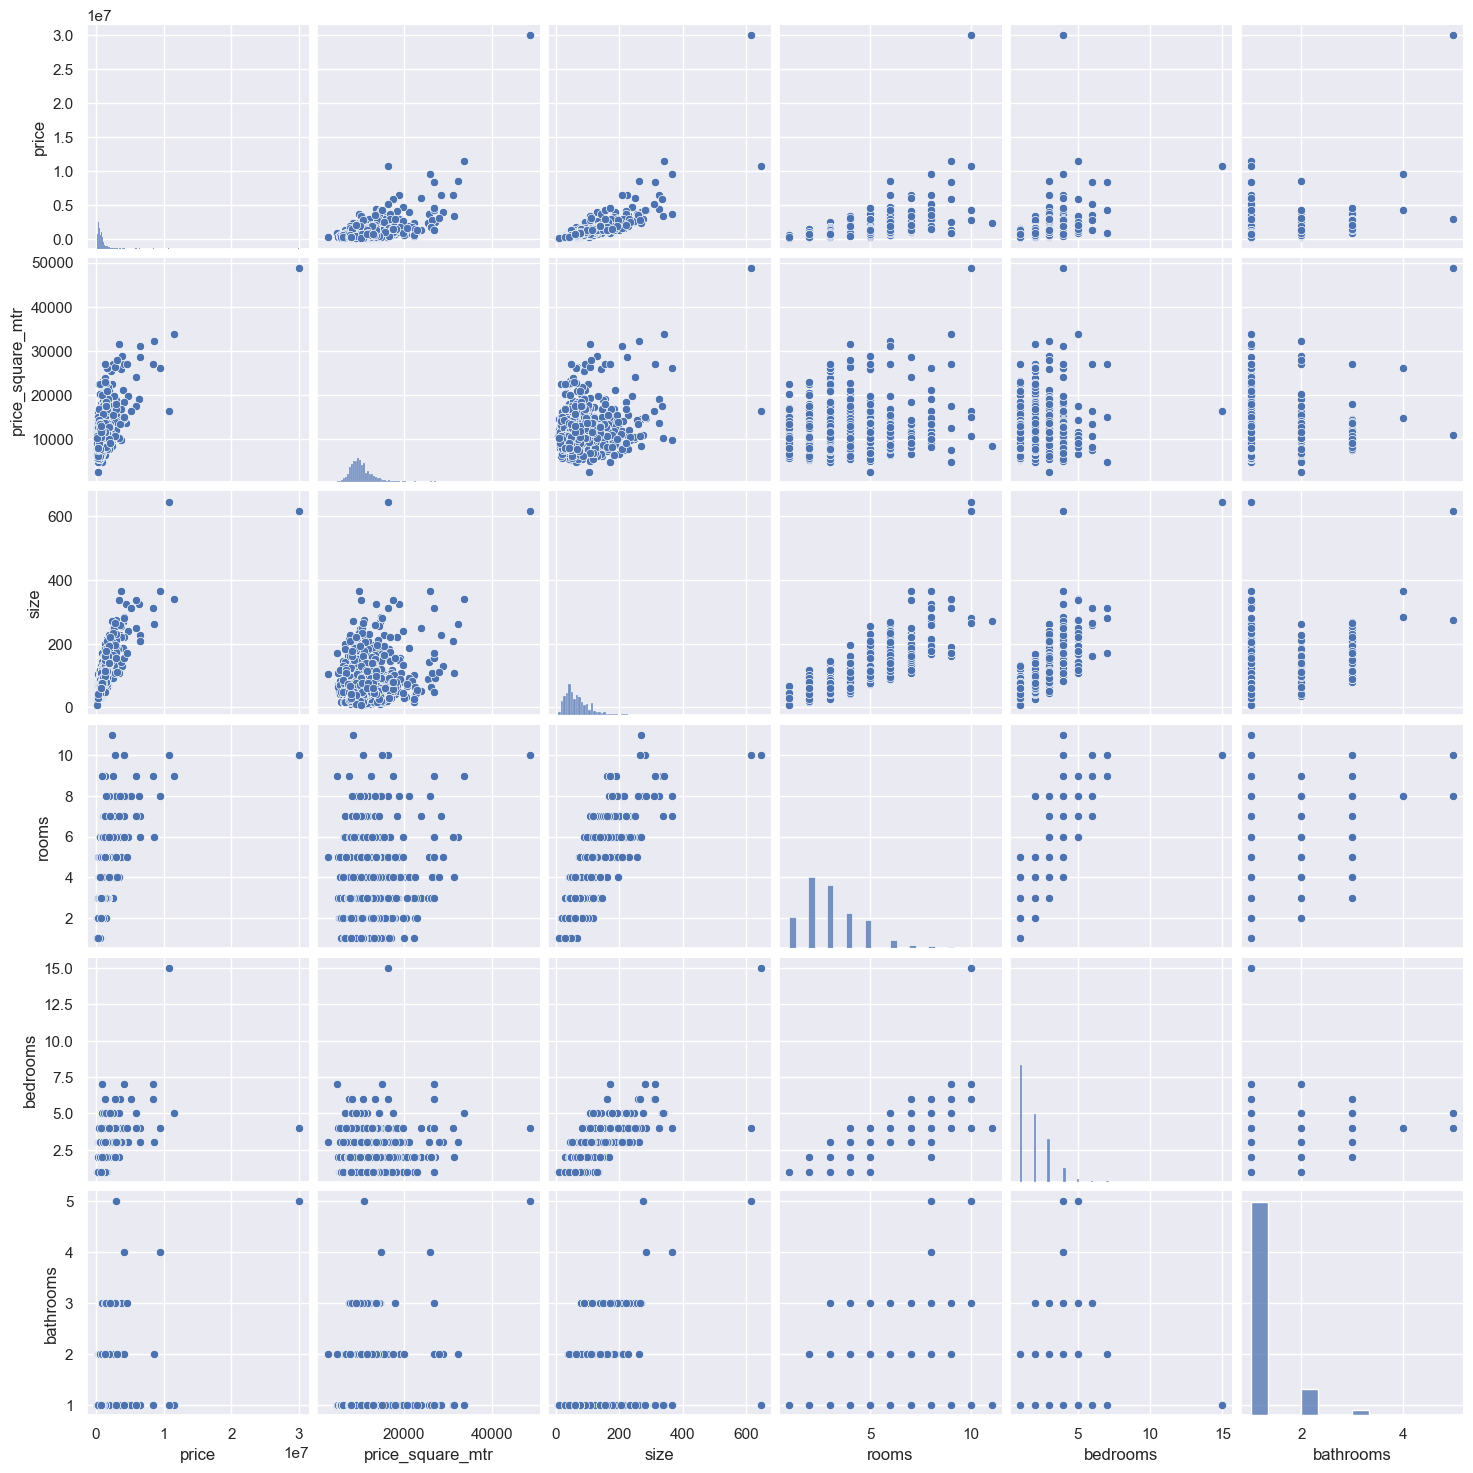

In [675]:
sns.pairplot(buy[buy_features])

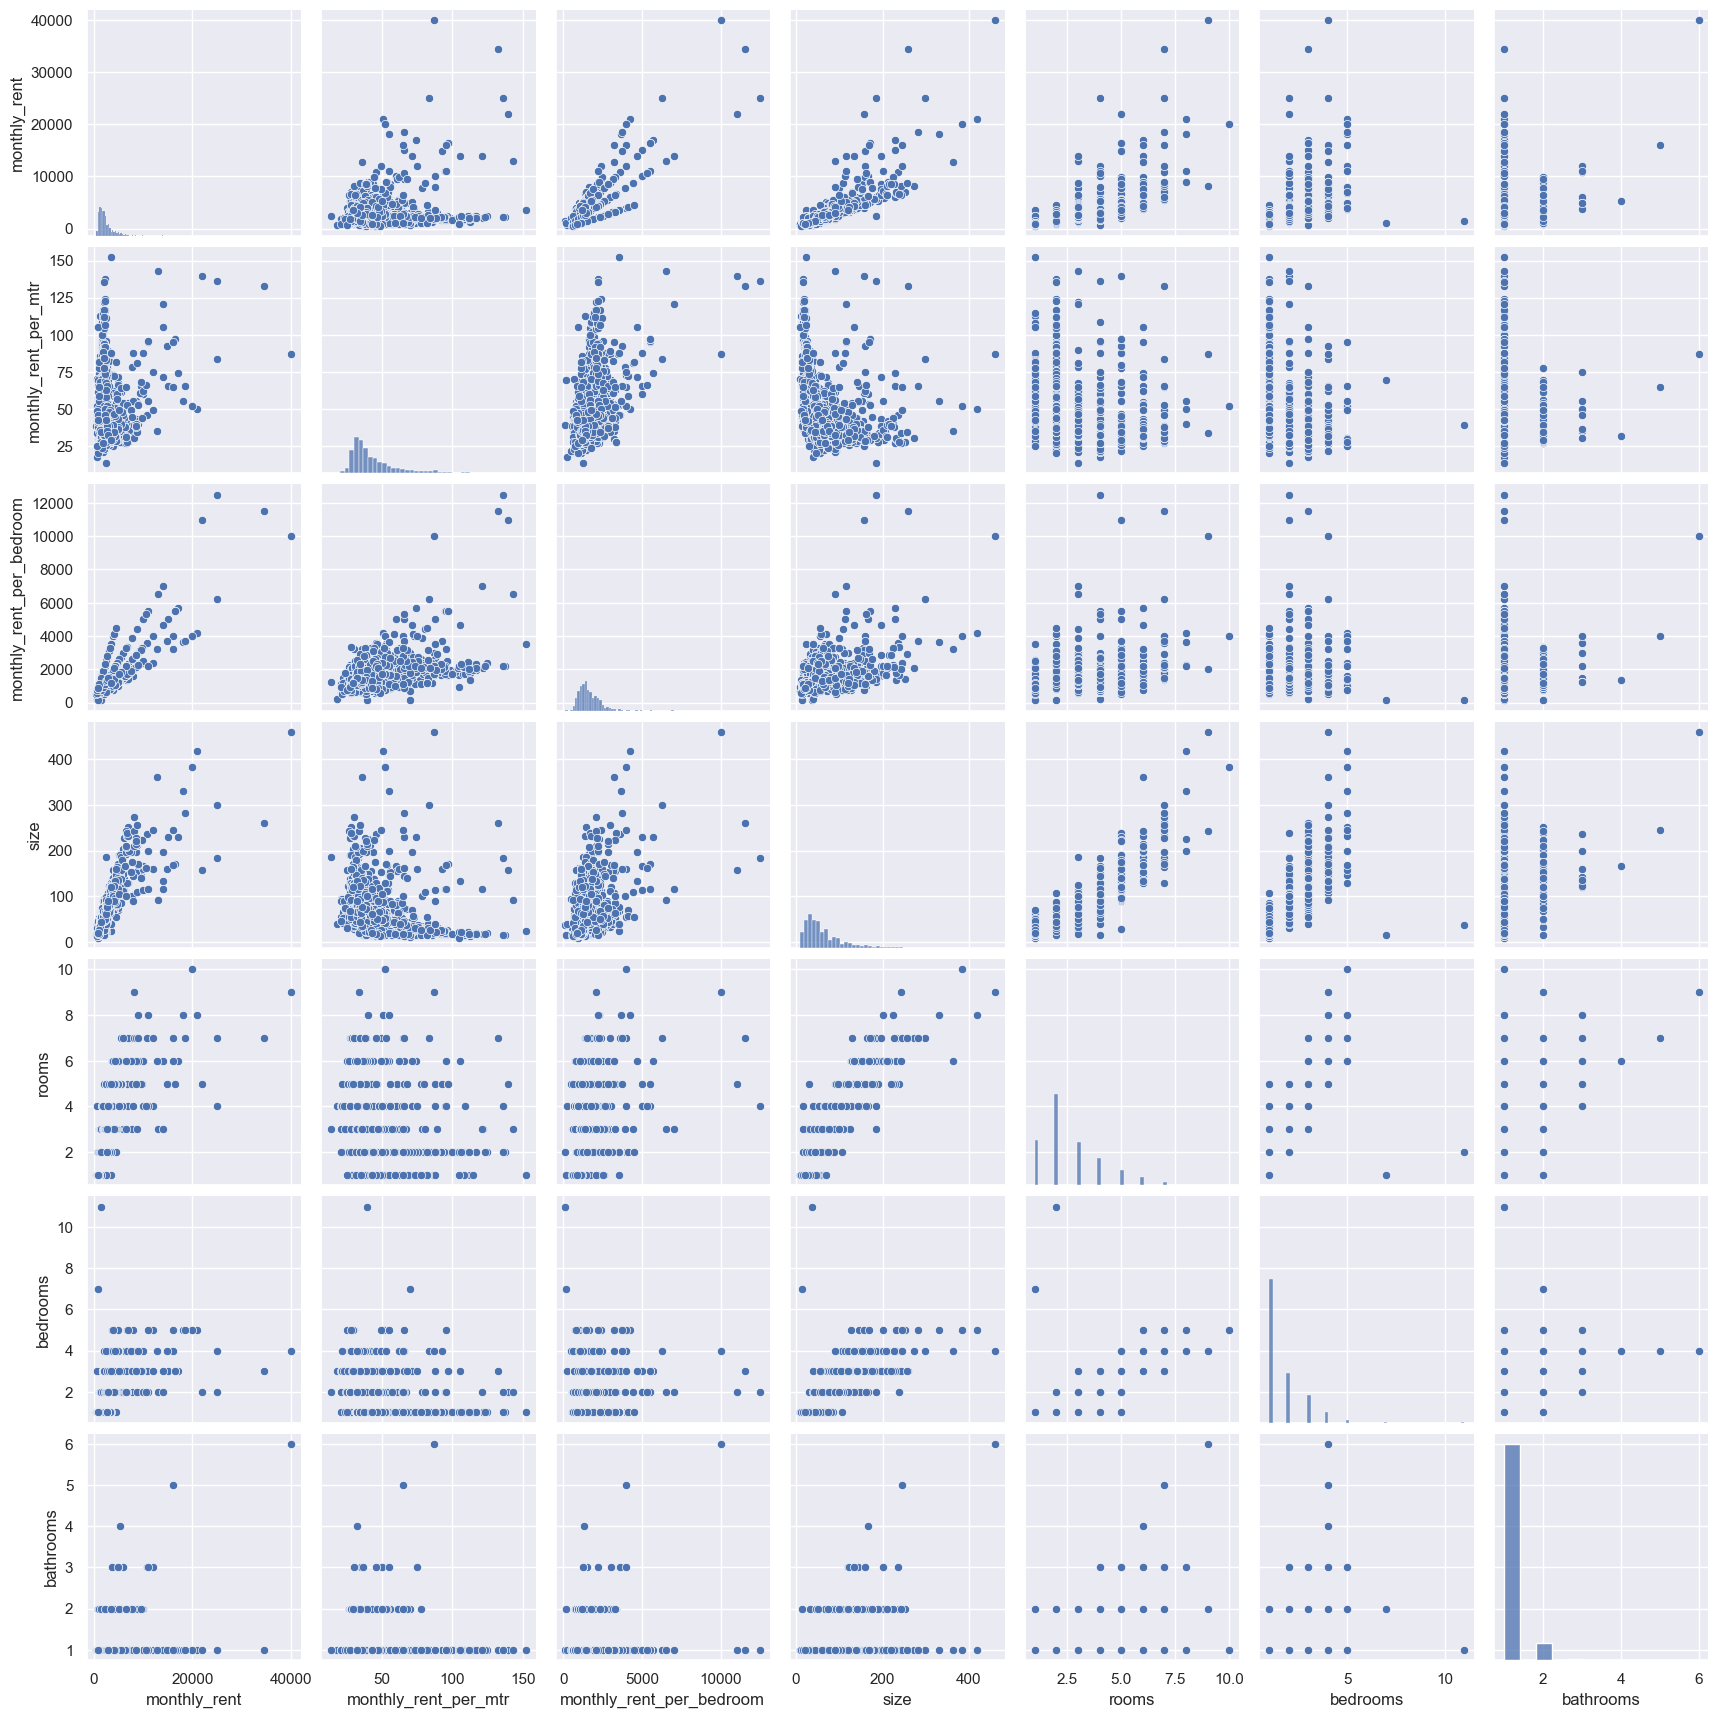

In [676]:
sns.pairplot(rent[rent_features])

There doesn't appear to be anything particularly groundbreaking here.

big apartments rent for more, and some areas are preferred over others (particularly 75008)

# Modelling

Let's make a simple model to see how accurately we can predict prices.

In [679]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [680]:
buy.columns

Index(['id', 'price', 'price_square_mtr', 'size', 'rooms', 'bedrooms',
       'bathrooms', 'realtor', 'zip_code', 'url', 'property_id', 'timestamp'],
      dtype='object')

In [688]:
X = buy.copy()
X['zip_code_orig'] = X['zip_code'] # preserve this for stratification
X = pd.get_dummies(X, columns=['zip_code']) # convert string to boolean value

In [686]:
X.columns

Index(['id', 'price', 'price_square_mtr', 'size', 'rooms', 'bedrooms',
       'bathrooms', 'realtor', 'url', 'property_id', 'timestamp',
       'zip_code_orig', 'zip_code_75001', 'zip_code_75002', 'zip_code_75003',
       'zip_code_75004', 'zip_code_75005', 'zip_code_75006', 'zip_code_75007',
       'zip_code_75008', 'zip_code_75009', 'zip_code_75010', 'zip_code_75011',
       'zip_code_75012', 'zip_code_75013', 'zip_code_75014', 'zip_code_75015',
       'zip_code_75016', 'zip_code_75017', 'zip_code_75018', 'zip_code_75019',
       'zip_code_75020'],
      dtype='object')

In [694]:
x_cols = ['size', 'rooms', 'bedrooms',
       'bathrooms', 'zip_code_75001', 'zip_code_75002', 'zip_code_75003',
       'zip_code_75004', 'zip_code_75005', 'zip_code_75006', 'zip_code_75007',
       'zip_code_75008', 'zip_code_75009', 'zip_code_75010', 'zip_code_75011',
       'zip_code_75012', 'zip_code_75013', 'zip_code_75014', 'zip_code_75015',
       'zip_code_75016', 'zip_code_75017', 'zip_code_75018', 'zip_code_75019',
       'zip_code_75020']

In [695]:
x_train, x_test, y_train, y_test = train_test_split(
    X[x_cols],
    X['price'],
    stratify=X['zip_code_orig'],
    random_state=42
)

In [696]:
x_train.head()

,size,rooms,bedrooms,bathrooms,zip_code_75001,zip_code_75002,zip_code_75003,zip_code_75004,zip_code_75005,zip_code_75006,...,zip_code_75011,zip_code_75012,zip_code_75013,zip_code_75014,zip_code_75015,zip_code_75016,zip_code_75017,zip_code_75018,zip_code_75019,zip_code_75020
1822,46.0,3.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1245,80.0,3.0,2.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1802,30.0,2.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
633,46.0,2.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
504,64.0,3.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [697]:
y_test.head()

1247    899999.0
2036    328000.0
220     590000.0
100     700000.0
741     300000.0
Name: price, dtype: float64

In [698]:
# Let's fit the model
regr_buy = RandomForestRegressor(random_state=42)
regr_buy.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [699]:
regr_buy.score(x_test, y_test)

0.7309526760831484

Not bad for a super quick and simple model.

Let's do the same for rentals:

In [700]:
rent.columns

Index(['id', 'monthly_rent', 'size', 'rooms', 'bedrooms', 'bathrooms',
       'realtor', 'zip_code', 'url', 'property_id', 'timestamp',
       'monthly_rent_per_mtr', 'monthly_rent_per_bedroom'],
      dtype='object')

In [701]:
rent['zip_code_orig'] = rent['zip_code']

In [708]:
rent_reg_data = pd.get_dummies(rent, columns=['zip_code']) # convert string to boolean value

In [709]:
rent_reg_data.columns

Index(['id', 'monthly_rent', 'size', 'rooms', 'bedrooms', 'bathrooms',
       'realtor', 'url', 'property_id', 'timestamp', 'monthly_rent_per_mtr',
       'monthly_rent_per_bedroom', 'zip_code_orig', 'zip_code_75001',
       'zip_code_75002', 'zip_code_75003', 'zip_code_75004', 'zip_code_75005',
       'zip_code_75006', 'zip_code_75007', 'zip_code_75008', 'zip_code_75009',
       'zip_code_75010', 'zip_code_75011', 'zip_code_75012', 'zip_code_75013',
       'zip_code_75014', 'zip_code_75015', 'zip_code_75016', 'zip_code_75017',
       'zip_code_75018', 'zip_code_75019', 'zip_code_75020'],
      dtype='object')

In [705]:
x_cols = ['size', 'rooms', 'bedrooms', 'bathrooms','zip_code_75001',
       'zip_code_75002', 'zip_code_75003', 'zip_code_75004', 'zip_code_75005',
       'zip_code_75006', 'zip_code_75007', 'zip_code_75008', 'zip_code_75009',
       'zip_code_75010', 'zip_code_75011', 'zip_code_75012', 'zip_code_75013',
       'zip_code_75014', 'zip_code_75015', 'zip_code_75016', 'zip_code_75017',
       'zip_code_75018', 'zip_code_75019', 'zip_code_75020']

In [710]:
x_train_rent, x_test_rent, y_train_rent, y_test_rent = train_test_split(
    rent_reg_data[x_cols],
    rent_reg_data['monthly_rent'],
    stratify=rent_reg_data['zip_code_orig'],
    random_state=42
)

In [711]:
# Let's fit the model
regr_rent = RandomForestRegressor(random_state=42)
regr_rent.fit(x_train_rent, y_train_rent)

RandomForestRegressor(random_state=42)

In [712]:
regr_rent.score(x_test_rent, y_test_rent)

0.5807647184604412

Not as accurate as the buy prices. Which is to be expected as there's less data.

There's a reason people personally inspect properties before buying, the on-paper stats only make up part of the picture. These stats don't tell you anything about things like the appliances, the paint/decor, the view, problem neighbours, etc.

With that being said, it's still a useful tool to reduce the number of properties you need to look at. I like to think of it as a pre-screening tool.